# Underground Water Quality in São Carlos/SP

Description

## Downloading dataset

Description

In [676]:
import requests
import tabula
import os.path

In [677]:
def convert_month_to_string(month):
    if month < 10:
        month_str = '0' + str(month) 
    else:
        month_str = str(month)
    return month_str

In [678]:
def define_file_names(month_str, year_str):
    pdf_name = 'qualidade' + month_str + '-' + year_str + '.pdf'
    csv_name = year_str + '_' + month_str + '.csv'
    return pdf_name, csv_name

In [679]:
for year in range(2010,2022):
    year_str = str(year)
    for month in range(1,13):
        month_str = convert_month_to_string(month)
        pdf_name, csv_name = define_file_names(month_str, year_str)
        if os.path.isfile(pdf_name):
            print('PDF file on year: {}, month: {} was already downloaded'.format(year, month))
        else:
            url = 'https://www.saaesaocarlos.com.br/saaesc/docs/qualidade/' + pdf_name
            response = requests.get(url)
            if response.content == b'Not Found [CFN #0005]':
                print('PDF file on year: {}, month: {} does not exist'.format(year, month))
            else:
                with open(pdf_name, 'wb') as f:
                    f.write(response.content)

PDF file on year: 2010, month: 1 was already downloaded
PDF file on year: 2010, month: 2 was already downloaded
PDF file on year: 2010, month: 3 was already downloaded
PDF file on year: 2010, month: 4 was already downloaded
PDF file on year: 2010, month: 5 was already downloaded
PDF file on year: 2010, month: 6 was already downloaded
PDF file on year: 2010, month: 7 was already downloaded
PDF file on year: 2010, month: 8 was already downloaded
PDF file on year: 2010, month: 9 was already downloaded
PDF file on year: 2010, month: 10 was already downloaded
PDF file on year: 2010, month: 11 was already downloaded
PDF file on year: 2010, month: 12 was already downloaded
PDF file on year: 2011, month: 1 was already downloaded
PDF file on year: 2011, month: 2 was already downloaded
PDF file on year: 2011, month: 3 was already downloaded
PDF file on year: 2011, month: 4 was already downloaded
PDF file on year: 2011, month: 5 was already downloaded
PDF file on year: 2011, month: 6 was already 

## Converting pdf to csv files

Description 

In [680]:
def check_if_output_exists_and_convert(csv_name, pdf_name, year, month):
    if os.path.isfile(csv_name):
        print('csv file on year: {}, month: {}  already exists'.format(year, month))
    else:
        if year < 2017:
            print(year, month, 'Antes de 2017')
            convert_pdf_to_csv_files_until_05_2017(pdf_name, csv_name)
        elif year == 2017 and month <6:
            print(year, month, 'Ano 2017 antes do mês 6. Tem que add cabeçalho a mão')
            convert_pdf_to_csv_files_until_05_2017(pdf_name, csv_name)
        else:
            print(year, month, 'Depois de 2017, depois do mês 6')
            convert_pdf_to_csv_files_from_06_2017(pdf_name, csv_name)

In [681]:
def convert_pdf_to_csv_files_until_05_2017(pdf_name, csv_name):
    #tabula.convert_into(pdf_name, csv_name, output_format='csv', pages='all', stream=True, guess=False, area=(120,40,510,570), columns=(78, 210, 250, 320, 330, 410, 450, 505))
    df = read_pdf(pdf_name, pages='all', stream=True, guess=False, area=(120,40,510,570), columns=(76, 210, 260, 310, 330, 410, 455, 505))
    df[0].to_csv(csv_name, encoding='latin1', index=False)

Notice that all files after 05/2017 cannot be read correctly by tabula library. Therefore they required some mannual adjusts to convert all rows from pdf to csv.

In [682]:
# # PDF visualization. Not necessary to the code

# from tabula import read_pdf
# teste = read_pdf('qualidade03-2021.pdf', encoding='latin1', pages='all', stream=True, guess=False, area=(130,40,510,570), columns=(72, 270, 300, 340, 360, 420, 460, 510))
# print(teste)

In [683]:
def convert_pdf_to_csv_files_from_06_2017(pdf_name, csv_name):
    if year <2019:
        df = tabula.read_pdf(pdf_name, encoding='utf-8', pages='all')
        tabula.convert_into(pdf_name, csv_name, output_format='csv', pages='all', stream=True, guess=True, area=(120,40,510,570))
    elif year == 2019 and month < 7:
        df = tabula.read_pdf(pdf_name, encoding='utf-8', pages='all')
        tabula.convert_into(pdf_name, csv_name, output_format='csv', pages='all', stream=True, guess=True,  area=(120,40,510,570))
    else:
        df = tabula.read_pdf(pdf_name, encoding='utf-8', pages='all')
        tabula.convert_into(pdf_name, csv_name, output_format='csv', pages='all', stream=True, guess=False,  area=(130,40,510,570), columns=(72, 270, 300, 340, 360, 420, 460, 510))

In [684]:
for year in range(2010,2022):
    year_str = str(year)
    for month in range(1,13):
        month_str = convert_month_to_string(month)
        pdf_name, csv_name = define_file_names(month_str, year_str)
        try:
            check_if_output_exists_and_convert(csv_name, pdf_name, year, month)
        except:
            print('PDF file on year: {}, month: {} was not found.\n "{}"'.format(year, month,pdf_name))

csv file on year: 2010, month: 1  already exists
csv file on year: 2010, month: 2  already exists
csv file on year: 2010, month: 3  already exists
csv file on year: 2010, month: 4  already exists
csv file on year: 2010, month: 5  already exists
csv file on year: 2010, month: 6  already exists
csv file on year: 2010, month: 7  already exists
csv file on year: 2010, month: 8  already exists
csv file on year: 2010, month: 9  already exists
csv file on year: 2010, month: 10  already exists
csv file on year: 2010, month: 11  already exists
csv file on year: 2010, month: 12  already exists
csv file on year: 2011, month: 1  already exists
csv file on year: 2011, month: 2  already exists
csv file on year: 2011, month: 3  already exists
csv file on year: 2011, month: 4  already exists
csv file on year: 2011, month: 5  already exists
csv file on year: 2011, month: 6  already exists
csv file on year: 2011, month: 7  already exists
csv file on year: 2011, month: 8  already exists
csv file on year:

# First analysis of the data frame

Description

In [685]:
import pandas as pd
import numpy as np

In [686]:
teste = pd.read_csv('2019_06.csv', encoding='latin1')

In [687]:
index_codigo = teste.index[teste.iloc[:,0] == '1']
print('qual index achou?\n',index_codigo.values)
if index_codigo.values[0] > 0:
    index_header = index_codigo - 1

qual index achou?
 [0]


In [688]:
all_headers = []
for year in range(2010, 2022):
    year_str = str(year)
    for month in range(1, 13):
        month_str = convert_month_to_string(month)
        pdf_name, csv_name = define_file_names(month_str, year_str)
        try:
            df = pd.read_csv(csv_name, encoding='latin1')
            all_headers.append(df.columns.to_list())
        except Exception as e:
                print(e)
                print('>>>csv file on year: {}, month: {} was not found.\n "{}"'.format(year, month,csv_name))


[Errno 2] No such file or directory: '2021_09.csv'
>>>csv file on year: 2021, month: 9 was not found.
 "2021_09.csv"
[Errno 2] No such file or directory: '2021_10.csv'
>>>csv file on year: 2021, month: 10 was not found.
 "2021_10.csv"
[Errno 2] No such file or directory: '2021_11.csv'
>>>csv file on year: 2021, month: 11 was not found.
 "2021_11.csv"
[Errno 2] No such file or directory: '2021_12.csv'
>>>csv file on year: 2021, month: 12 was not found.
 "2021_12.csv"


In [689]:
print(all_headers)

[['Código', 'Zona de Abastecimento', 'COR', 'TURBIDEZ', 'PH', 'CLORO RESIDUAL', 'FLUORETO', 'COLI.TOTAL', 'COLI.FECAL'], ['Código', 'Zona de Abastecimento', 'COR', 'TURBIDEZ', 'PH', 'CLORO RESIDUAL', 'FLUORETO', 'COLI.TOTAL', 'COLI.FECAL'], ['Código', 'Zona de Abastecimento', 'COR', 'TURBIDEZ', 'PH', 'CLORO RESIDUAL', 'FLUORETO', 'COLI.TOTAL', 'COLI.FECAL'], ['Código', 'Zona de Abastecimento', 'COR', 'TURBIDEZ', 'PH', 'CLORO RESIDUAL', 'FLUORETO', 'COLI.TOTAL', 'COLI.FECAL'], ['Código', 'Zona de Abastecimento', 'COR', 'TURBIDEZ', 'PH', 'CLORO RESIDUAL', 'FLUORETO', 'COLI.TOTAL', 'COLI.FECAL'], ['Código', 'Zona de Abastecimento', 'COR', 'TURBIDEZ', 'PH', 'CLORO RESIDUAL', 'FLUORETO', 'COLI.TOTAL', 'COLI.FECAL'], ['Código', 'Zona de Abastecimento', 'COR', 'TURBIDEZ', 'PH', 'CLORO RESIDUAL', 'FLUORETO', 'COLI.TOTAL', 'COLI.FECAL'], ['Código', 'Zona de Abastecimento', 'COR', 'TURBIDEZ', 'PH', 'CLORO RESIDUAL', 'FLUORETO', 'COLI.TOTAL', 'COLI.FECAL'], ['Código', 'Zona de Abastecimento', 'CO

In [690]:
type(all_headers)

list

In [691]:
len(all_headers)

140

In [692]:
first_elem = []
for i in range(140):
    first_elem.append(all_headers[i][0])
    
print(first_elem)

['Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código', 'Código',

In [693]:
header_verification = {}

for i in range(9):
    dict_key = all_headers[0][i]
    dict_value = []
    for j in range(140):
        dict_value.append(all_headers[j][i])
    header_verification[i] = dict_value

print(header_verification.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8])


PS: "2018_04.csv" had an additional column. It was removed manually.

In [694]:
header_verification = {}

for i in range(9):
    dict_key = all_headers[0][i]
    dict_value = []
    for j in range(140):
        dict_value.append(all_headers[j][i])
    header_verification[i] = dict_value
    unique_val = set(header_verification[i])
    print(unique_val)

print(header_verification.keys())

{'Código'}
{'Zona de Abastecimento / Fonte de Abastecimento', 'Zona de Abastecimento'}
{'COR', 'Cor'}
{'TURBIDEZ', 'Turbidez'}
{'PH', 'pH'}
{'CLORO RESIDUAL', 'Cloro Residual'}
{'Flouoreto', 'FLUORETO'}
{'COLI.TOTAL', 'Coli. Total'}
{'COLI.FECAL', 'Coli.Fecal'}
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8])


Now we are sure that all 140 csv files (from 01/2010 to 08/2021) have the same header.

# Managing files

Rename columns 
add coluna com ano e mês

In [695]:
df_row = pd.DataFrame(columns=['Code', 'Water_supply_zone', 'Color_uH', 'Turbidity_uT', 'pH', 'Residual_chlorine_mg/L', 'Fluoride_mg/L', 'Total_coliform', 'Fecal_coliform', 'Year', 'Month'])
for year in range(2010,2022):
    year_str = str(year)
    for month in range(1,13):
        month_str = convert_month_to_string(month)
        pdf_name, csv_name = define_file_names(month_str, year_str)
        try:
            # Read file
            df_aux = pd.read_csv(csv_name, encoding='latin1')
            print(csv_name)

            # Add column for year and month
            df_aux['Year'] = year_str
            df_aux['Month'] = month_str

            # Drop wrong rows
            df_aux.drop(df_aux[df_aux['Código']=='Código'].index, inplace=True)
            df_aux.dropna(inplace=True)

            # Rename header
            df_aux = df_aux.set_axis(['Code', 'Water_supply_zone', 'Color_uH', 'Turbidity_uT', 'pH', 'Residual_chlorine_mg/L', 'Fluoride_mg/L', 'Total_coliform', 'Fecal_coliform', 'Year', 'Month'], axis=1, inplace=False)
            df_row = pd.concat([df_row, df_aux], ignore_index=True)
        except:
            print('PDF file on year: {}, month: {} does not exist'.format(year, month))


print(df_row.tail())
    

2010_01.csv
2010_02.csv
2010_03.csv
2010_04.csv
2010_05.csv
2010_06.csv
2010_07.csv
2010_08.csv
2010_09.csv
2010_10.csv
2010_11.csv
2010_12.csv
2011_01.csv
2011_02.csv
2011_03.csv
2011_04.csv
2011_05.csv
2011_06.csv
2011_07.csv
2011_08.csv
2011_09.csv
2011_10.csv
2011_11.csv
2011_12.csv
2012_01.csv
2012_02.csv
2012_03.csv
2012_04.csv
2012_05.csv
2012_06.csv
2012_07.csv
2012_08.csv
2012_09.csv
2012_10.csv
2012_11.csv
2012_12.csv
2013_01.csv
2013_02.csv
2013_03.csv
2013_04.csv
2013_05.csv
2013_06.csv
2013_07.csv
2013_08.csv
2013_09.csv
2013_10.csv
2013_11.csv
2013_12.csv
2014_01.csv
2014_02.csv
2014_03.csv
2014_04.csv
2014_05.csv
2014_06.csv
2014_07.csv
2014_08.csv
2014_09.csv
2014_10.csv
2014_11.csv
2014_12.csv
2015_01.csv
2015_02.csv
2015_03.csv
2015_04.csv
2015_05.csv
2015_06.csv
2015_07.csv
2015_08.csv
2015_09.csv
2015_10.csv
2015_11.csv
2015_12.csv
2016_01.csv
2016_02.csv
2016_03.csv
2016_04.csv
2016_05.csv
2016_06.csv
2016_07.csv
2016_08.csv
2016_09.csv
2016_10.csv
2016_11.csv
2016

# Data cleaning

In [696]:
# Create datetime column

datetime = ['Year', 'Month']
df_row['Date_time'] = df_row[datetime].apply(lambda x: '-'.join(x.values.astype(str)), axis='columns')
df_row['Date_time'] = pd.to_datetime(df_row['Date_time'])

In [697]:
df_row.head(50)

,Code,Water_supply_zone,Color_uH,Turbidity_uT,pH,Residual_chlorine_mg/L,Fluoride_mg/L,Total_coliform,Fecal_coliform,Year,Month,Date_time
0,1,ETA - Reservatório Apoiado,<1 uH,"0,39 uT","7,8",1 mg/L,"0,65 mg/L",Ausência,Ausência,2010,01,2010-01-01
1,2,Rui Barbosa - Reservatório Apoiado,<1 uH,"0,39 uT","7,8",1 mg/L,"0,65 mg/L",Ausência,Ausência,2010,01,2010-01-01
2,3,Vila Ney - Reservatório Apoiado,<1 uH,"0,29 uT","6,9","0,8 mg/L","0,7 mg/L",Ausência,Ausência,2010,01,2010-01-01
3,4,Vila Alpes - Reservatório Apoiado,<1 uH,"0,28 uT","6,5","0,9 mg/L","<0,6 mg/L",Ausência,Ausência,2010,01,2010-01-01
4,5,Vila Alpes - Reservatório Elevado,<1 uH,"0,41 uT","7,8","1,1 mg/L","0,68 mg/L",Ausência,Ausência,2010,01,2010-01-01
5,6,Distrito Industrial Miguel Abdelnur,<1 uH,"0,28 uT","6,5","0,9 mg/L","<0,6 mg/L",Ausência,Ausência,2010,01,2010-01-01
6,7,Jardim Novo Horizonte,<1 uH,"0,16 uT","6,3","1,1 mg/L",">0,8 mg/L",Ausência,Ausência,2010,01,2010-01-01
7,8,Cruzeiro do Sul,<1 uH,"0,23 uT",6,1 mg/L,">0,8 mg/L",Ausência,Ausência,2010,01,2010-01-01
8,9,Boa Vista,<1 uH,"0,26 uT","6,7","1,4 mg/L","0,68 mg/L",Ausência,Ausência,2010,01,2010-01-01
9,10,Parque Faber,<1 uH,"0,27 uT","7,1","0,9 mg/L","0,7 mg/L",Ausência,Ausência,2010,01,2010-01-01


In [698]:
# Remove units from columns

df_row['Color_uH'] = df_row['Color_uH'].map(lambda x: x.lstrip('uHuT-').rstrip('uHuT-'))
df_row['Turbidity_uT'] = df_row['Turbidity_uT'].map(lambda x: x.lstrip('uT').rstrip('uT'))
df_row['Residual_chlorine_mg/L'] = df_row['Residual_chlorine_mg/L'].map(lambda x: x.lstrip('mg/L').rstrip('mg/L'))
df_row['Fluoride_mg/L'] = df_row['Fluoride_mg/L'].map(lambda x: x.lstrip('mg/L').rstrip('mg/L'))
print(df_row.head(3))

  Code                   Water_supply_zone Color_uH Turbidity_uT   pH  \
0    1          ETA - Reservatório Apoiado      <1         0,39   7,8   
1    2  Rui Barbosa - Reservatório Apoiado      <1         0,39   7,8   
2    3     Vila Ney - Reservatório Apoiado      <1         0,29   6,9   

  Residual_chlorine_mg/L Fluoride_mg/L Total_coliform Fecal_coliform  Year  \
0                     1          0,65        Ausência       Ausência  2010   
1                     1          0,65        Ausência       Ausência  2010   
2                   0,8           0,7        Ausência       Ausência  2010   

  Month  Date_time  
0    01 2010-01-01  
1    01 2010-01-01  
2    01 2010-01-01  


In [699]:
df_row[['Water_supply_zone', 'Color_uH', 'Turbidity_uT', 'pH',
       'Residual_chlorine_mg/L', 'Fluoride_mg/L', 'Total_coliform',
       'Fecal_coliform']] = df_row[['Water_supply_zone', 'Color_uH', 'Turbidity_uT', 'pH',
       'Residual_chlorine_mg/L', 'Fluoride_mg/L', 'Total_coliform',
       'Fecal_coliform']].apply(lambda x: x.str.replace(',', '.'))
df_row.head(3)

,Code,Water_supply_zone,Color_uH,Turbidity_uT,pH,Residual_chlorine_mg/L,Fluoride_mg/L,Total_coliform,Fecal_coliform,Year,Month,Date_time
0,1,ETA - Reservatório Apoiado,<1,0.39,7.8,1,0.65,Ausência,Ausência,2010,01,2010-01-01
1,2,Rui Barbosa - Reservatório Apoiado,<1,0.39,7.8,1,0.65,Ausência,Ausência,2010,01,2010-01-01
2,3,Vila Ney - Reservatório Apoiado,<1,0.29,6.9,0.8,0.7,Ausência,Ausência,2010,01,2010-01-01


In [700]:
def only_number(value):
    try:
        if value[0] == '<':
            return np.NaN
        elif value[0] =='>':
            return np.NaN
        else:
            return float(value)
    except:
        return value
    

def only_symbol(value):
    try:
        if value[0] == '<':
            return value
        else:
            return np.NaN
    except:
        return value

In [701]:
df_row['pH'].unique()

array(['7.8', '6.9', '6.5', '6.3', '6', '6.7', '7.1', '6.8', '6.6', '6.2',
       '6.4', '7.3', '7.7', '7', '7.6', '7.4', '7.9', '6.1', '7.5', '7.2',
       '5.7', '5.8', '5.6', '6.0', '5.9', '6.31', '6.23', '6.33', '6.94',
       '6.79', '6.61', '6.05', '6.47', '6.08', '5.95', '<6.0', '6.15',
       '5.5', '6.88', '8', '6.68', '7.04', '6.37', '6.83', '0.74', '6.27',
       '6.32', '8.1', '6.57', '6.12', '6.21', '8.2', '6.51', '6.36',
       '6.28', '6.73', '5.3', '6.9*', '5.4', '8.3', '6.75', '8.7', '9',
       '8.9', '6.07', '8.5', '8.4', '6.29', '6.43', '6.18', '6.25',
       '6.22', '6.14', '6.17', '0.4', '5.1', '5.2', '0.67', '0.7', '6.06',
       '6.01', '7.47', '7.38', '6.91', '6.24', '6.34', '0.6', '6.03',
       '6.49', '6.19', '6.52', '7.69', '6.09', '5.92', '8.08', '5',
       '6.11', '8.26', '6.16', '8.22', '7.88'], dtype=object)

In [702]:
df_row['pH_number'] = df_row['pH'].apply(only_number)
df_row['pH_symbol'] = df_row['pH'].apply(only_symbol)
df_row[1294: 1296]

,Code,Water_supply_zone,Color_uH,Turbidity_uT,pH,Residual_chlorine_mg/L,Fluoride_mg/L,Total_coliform,Fecal_coliform,Year,Month,Date_time,pH_number,pH_symbol
1294,28,C.E.A.T.,4,0.67,7.4,0.84,0.71,Ausência,Ausência,2013,12,2013-12-01,7.4,NaN
1295,29,Res. Tutoya do Vale,<1,0.17,<6.0,0.91,>0.80,Ausência,Ausência,2013,12,2013-12-01,NaN,<6.0


In [703]:
print(df_row['pH_number'].unique())
df_row.loc[df_row['pH_number'] == '6.9*']

[7.8 6.9 6.5 6.3 6.0 6.7 7.1 6.8 6.6 6.2 6.4 7.3 7.7 7.0 7.6 7.4 7.9 6.1
 7.5 7.2 5.7 5.8 5.6 5.9 6.31 6.23 6.33 6.94 6.79 6.61 6.05 6.47 6.08 5.95
 nan 6.15 5.5 6.88 8.0 6.68 7.04 6.37 6.83 0.74 6.27 6.32 8.1 6.57 6.12
 6.21 8.2 6.51 6.36 6.28 6.73 5.3 '6.9*' 5.4 8.3 6.75 8.7 9.0 8.9 6.07 8.5
 8.4 6.29 6.43 6.18 6.25 6.22 6.14 6.17 0.4 5.1 5.2 0.67 0.7 6.06 6.01
 7.47 7.38 6.91 6.24 6.34 0.6 6.03 6.49 6.19 6.52 7.69 6.09 5.92 8.08 5.0
 6.11 8.26 6.16 8.22 7.88]


,Code,Water_supply_zone,Color_uH,Turbidity_uT,pH,Residual_chlorine_mg/L,Fluoride_mg/L,Total_coliform,Fecal_coliform,Year,Month,Date_time,pH_number,pH_symbol
1696,10,Parque Faber,<1,0.16,6.9*,1.1,0.65,Ausência,Ausência,2015,02,2015-02-01,6.9*,NaN


In [704]:
df_row = df_row.replace('6.9*', 6.9)
df_row[1696:1698]

,Code,Water_supply_zone,Color_uH,Turbidity_uT,pH,Residual_chlorine_mg/L,Fluoride_mg/L,Total_coliform,Fecal_coliform,Year,Month,Date_time,pH_number,pH_symbol
1696,10,Parque Faber,<1,0.16,6.9,1.1,0.65,Ausência,Ausência,2015,02,2015-02-01,6.9,NaN
1697,11,Santa Felicia,<1,0.2,6.6,1.1,0.7,Ausência,Ausência,2015,02,2015-02-01,6.6,NaN


In [705]:
df_row['Color_uH_number'] = df_row['Color_uH'].apply(only_number)
df_row['Color_uH_symbol'] = df_row['Color_uH'].apply(only_symbol)
df_row[15:17]

,Code,Water_supply_zone,Color_uH,Turbidity_uT,pH,Residual_chlorine_mg/L,Fluoride_mg/L,Total_coliform,Fecal_coliform,Year,Month,Date_time,pH_number,pH_symbol,Color_uH_number,Color_uH_symbol
15,16,Jokey Club,<1,0.15,6.2,0.7,0.68,Ausência,Ausência,2010,01,2010-01-01,6.2,NaN,NaN,<1
16,17,Ruy Barbosa/Nova Estância,1,0.41,7.8,1.1,0.68,Ausência,Ausência,2010,01,2010-01-01,7.8,NaN,1.0,NaN


In [706]:
print(df_row['Color_uH_number'].unique())
df_row = df_row.replace('', np.NaN)

[nan 1.0 11.0 10.0 2.0 3.0 5.0 9.0 4.0 3.7 6.0 3.25 7.0 3.2 1.5 8.0 ''
 2.75 2.7 1.4 1.6 2.4 1.7 1.1 1.2 1.8 2.5 1.3 1.25 4.5 6.5 3.5 2.3 3.6 2.2
 3.4 13.0 2.1 2.6 1.9 3.3 4.7 15.0 3.8 3.9 0.7 5.5 6.3 7.3 12.0]


In [707]:
df_row['Turbidity_uT_number'] = df_row['Turbidity_uT'].apply(only_number)
df_row['Turbidity_uT_symbol'] = df_row['Turbidity_uT'].apply(only_symbol)
df_row['Turbidity_uT'].unique()
df_row[4320:4322]

,Code,Water_supply_zone,Color_uH,Turbidity_uT,pH,Residual_chlorine_mg/L,Fluoride_mg/L,Total_coliform,Fecal_coliform,Year,Month,Date_time,pH_number,pH_symbol,Color_uH_number,Color_uH_symbol,Turbidity_uT_number,Turbidity_uT_symbol
4320,43.0,Jardim do Bosque Jardim do Bosque,<4,<0.3,6.1,0.4,>0.8,Ausência,Ausência,2021,06,2021-06-01,6.1,NaN,NaN,<4,NaN,<0.3
4321,1.0,ETA - Reservatório Apoiado ETA,5,0.4,7.1,1.2,0.6,Ausência,Ausência,2021,07,2021-07-01,7.1,NaN,5.0,NaN,0.4,NaN


In [708]:
print(df_row['Turbidity_uT_number'].unique())

[0.39 0.29 0.28 0.41 0.16 0.23 0.26 0.27 0.13 0.11 0.15 0.22 0.24 0.18
 0.3  0.14 1.77 0.43 0.66 0.4  0.21 0.25 0.17 0.19 0.12 0.46 1.52 0.56
 0.31 0.36 0.2  0.84 0.53 0.52 0.34 0.35 0.49 0.38 0.32 0.33 0.45 0.62
 0.61 0.51 0.72 0.57 0.44 0.87 0.42 0.78 1.   0.68 0.5  0.37 0.76 1.44
 0.58 0.47 0.55 0.83 1.55 0.69 0.82 0.6  0.48 0.59 0.54 0.89 0.64 0.67
 0.7  0.85 0.73 0.8  0.71 1.5  0.81 0.9  0.77 1.2  0.1   nan 0.74 0.93
 0.75 0.88 5.   0.79 0.63 1.8  1.1  0.91 0.65 1.4  1.6  1.3  1.9  1.01
 0.92]


In [709]:
df_row['Residual_chlorine_mg/L_number'] = df_row['Residual_chlorine_mg/L'].apply(only_number)
df_row['Residual_chlorine_mg/L_symbol'] = df_row['Residual_chlorine_mg/L'].apply(only_symbol)
df_row['Residual_chlorine_mg/L'].unique()
df_row.loc[df_row['Residual_chlorine_mg/L'] == '<0.2 ']
df_row[3293:3295]

,Code,Water_supply_zone,Color_uH,Turbidity_uT,pH,Residual_chlorine_mg/L,Fluoride_mg/L,Total_coliform,Fecal_coliform,Year,Month,Date_time,pH_number,pH_symbol,Color_uH_number,Color_uH_symbol,Turbidity_uT_number,Turbidity_uT_symbol,Residual_chlorine_mg/L_number,Residual_chlorine_mg/L_symbol
3293,32,Poço CEAT,<1,<0.3,7.5,<0.2,<0.6,Ausência,Ausência,2018,12,2018-12-01,7.5,NaN,NaN,<1,NaN,<0.3,NaN,<0.2
3294,34,Poço Embaré,1.3,<0.3,6,1.2,0.65,Ausência,Ausência,2018,12,2018-12-01,6.0,NaN,1.3,NaN,NaN,<0.3,1.2,NaN


In [710]:
print(df_row['Residual_chlorine_mg/L_number'].unique())

[1.    0.8   0.9   1.1   1.4   0.7   0.5   0.4   0.6   1.2   1.5   1.3
 1.6   0.79  0.98  0.84  0.89  0.82  0.77  0.74  0.97  0.78  0.86  1.02
 1.25  0.3   0.93  0.76  0.69  0.36  0.87  0.92  0.88  0.66  1.19  0.67
 0.44  0.85  0.58  0.65  0.75  0.72  0.46  0.61  0.872 0.95  0.91  1.06
 0.73  1.13  1.04  0.96  0.81  0.43  0.71  0.64  0.51  1.22  0.62  1.05
 0.99  0.55  0.56  1.09  0.63  1.01  0.83  0.52  1.14  1.23  0.68  0.2
 0.38  1.07  0.57  0.54  1.39  1.63  1.56  1.12  1.08  0.41  1.03  0.94
 1.54  1.34  1.24  1.16  1.11  1.26  1.28  1.18  1.17  1.35  1.43  1.21
 1.36  0.49  1.87  1.48  1.31  1.59  1.33  1.78  1.29  1.37  1.15  1.41
 1.57  1.55  1.52  1.47  1.27  1.51  1.38  1.42  1.32  1.45  1.65  1.8
 1.7   1.9   1.46  7.8     nan 1.61  1.77  1.76  1.49  2.   ]


In [711]:
df_row['Fluoride_mg/L_number'] = df_row['Fluoride_mg/L'].apply(only_number)
df_row['Fluoride_mg/L_symbol'] = df_row['Fluoride_mg/L'].apply(only_symbol)
df_row[3293:3295]

,Code,Water_supply_zone,Color_uH,Turbidity_uT,pH,Residual_chlorine_mg/L,Fluoride_mg/L,Total_coliform,Fecal_coliform,Year,...,pH_number,pH_symbol,Color_uH_number,Color_uH_symbol,Turbidity_uT_number,Turbidity_uT_symbol,Residual_chlorine_mg/L_number,Residual_chlorine_mg/L_symbol,Fluoride_mg/L_number,Fluoride_mg/L_symbol
3293,32,Poço CEAT,<1,<0.3,7.5,<0.2,<0.6,Ausência,Ausência,2018,...,7.5,NaN,NaN,<1,NaN,<0.3,NaN,<0.2,NaN,<0.6
3294,34,Poço Embaré,1.3,<0.3,6,1.2,0.65,Ausência,Ausência,2018,...,6.0,NaN,1.3,NaN,NaN,<0.3,1.2,NaN,0.65,NaN


In [712]:
print(df_row['Fluoride_mg/L_number'].unique())

[0.65 0.7   nan 0.68 0.66 0.74 0.67 0.69 0.61 0.64 0.71 0.63 0.62 0.72
 0.8  0.6  0.73 0.76 0.77 0.79 0.75 0.39 0.78 0.9  0.56 0.43 0.54 0.84
 0.48 0.45 0.89 0.81 0.55 0.97 0.86 1.14 0.31 0.47 0.83]


In [713]:
df_row['Total_coliform'].unique()
df_row['Total_coliform'] = 'Absence'

In [714]:
df_row['Fecal_coliform'].unique()
df_row['Fecal_coliform'] = 'Absence'

In [715]:
for i in range(1,36):
    print('Code {}: '.format(i), df_row[df_row['Code'] == i]['Water_supply_zone'].unique())

Code 1:  ['ETA - Reservatório Apoiado' 'ETA - Reservatório Apoiado ETA']
Code 2:  ['Rui Barbosa - Reservatório Apoiado'
 'Rui Barbosa - Reservatório Apoiado ETA'
 'Rui Barbosa - Reservatório Apoiado Poço Rui Barbosa']
Code 3:  ['Vila Ney - Reservatório Apoiado' 'Vila Nery - Reservatório Apoiado'
 'Vila Nery - Reservatório Apoiado Reservatório Vila Nery']
Code 4:  ['Vila Alpes - Reservatório Apoiado'
 'Vila Alpes - Reservatório Apoiado Reservatório Vila Alpes']
Code 5:  ['Vila Alpes - Reservatório Elevado'
 'Vila Alpes - Reservatório Elevado São Sebastião']
Code 6:  ['Distrito Industrial Miguel Abdelnur'
 'Distrito Industrial Miguel Abdelnur Poço Vila Alpes']
Code 7:  ['Jardim Novo Horizonte' 'Jardim Novo Horizonte Poço Tramer'
 'Jardim Novo Horizonte Poço Novo Horizonte']
Code 8:  ['Cruzeiro do Sul' 'Cruzeiro do Sul Poço Cruzeiro do Sul']
Code 9:  ['Boa Vista' 'Boa Vista Poço Boa Vista']
Code 10:  ['Parque Faber' 'Parque Faber Poço Faber']
Code 11:  ['Santa Felicia' 'Santa Felicia Poço

# Data frame Analysis

In [716]:
df = df_row.drop(['Year', 'Month','pH', 'Color_uH', 'Turbidity_uT', 'Residual_chlorine_mg/L', 'Fluoride_mg/L'], axis=1)
df.head(3)

,Code,Water_supply_zone,Total_coliform,Fecal_coliform,Date_time,pH_number,pH_symbol,Color_uH_number,Color_uH_symbol,Turbidity_uT_number,Turbidity_uT_symbol,Residual_chlorine_mg/L_number,Residual_chlorine_mg/L_symbol,Fluoride_mg/L_number,Fluoride_mg/L_symbol
0,1,ETA - Reservatório Apoiado,Absence,Absence,2010-01-01,7.8,NaN,NaN,<1,0.39,NaN,1.0,NaN,0.65,NaN
1,2,Rui Barbosa - Reservatório Apoiado,Absence,Absence,2010-01-01,7.8,NaN,NaN,<1,0.39,NaN,1.0,NaN,0.65,NaN
2,3,Vila Ney - Reservatório Apoiado,Absence,Absence,2010-01-01,6.9,NaN,NaN,<1,0.29,NaN,0.8,NaN,0.70,NaN


In [717]:
df.describe()

,pH_number,Color_uH_number,Turbidity_uT_number,Residual_chlorine_mg/L_number,Fluoride_mg/L_number
count,4358.000000,2039.000000,3315.000000,4380.000000,3883.000000
mean,6.514559,2.229205,0.320989,0.947473,0.688823
std,0.591556,1.816564,0.225969,0.281088,0.056596
min,0.400000,0.700000,0.100000,0.200000,0.310000
25%,6.150000,1.000000,0.200000,0.800000,0.650000
50%,6.400000,1.500000,0.300000,0.900000,0.690000
75%,6.800000,3.000000,0.370000,1.100000,0.730000
max,9.000000,15.000000,5.000000,7.800000,1.140000


# Graphs

In [718]:
eval_param = df[['pH_number', 'Color_uH_number', 'Turbidity_uT_number', 'Residual_chlorine_mg/L_number', 'Fluoride_mg/L_number']]
corr = eval_param.corr()
corr

,pH_number,Color_uH_number,Turbidity_uT_number,Residual_chlorine_mg/L_number,Fluoride_mg/L_number
pH_number,1.000000,0.222045,0.203448,0.096168,0.014603
Color_uH_number,0.222045,1.000000,0.559736,0.014967,-0.001197
Turbidity_uT_number,0.203448,0.559736,1.000000,0.081567,0.046409
Residual_chlorine_mg/L_number,0.096168,0.014967,0.081567,1.000000,0.069370
Fluoride_mg/L_number,0.014603,-0.001197,0.046409,0.069370,1.000000


In [719]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,pH_number,Color_uH_number,Turbidity_uT_number,Residual_chlorine_mg/L_number,Fluoride_mg/L_number
pH_number,nan,nan,nan,nan,nan
Color_uH_number,0.22,nan,nan,nan,nan
Turbidity_uT_number,0.20,0.56,nan,nan,nan
Residual_chlorine_mg/L_number,0.10,0.01,0.08,nan,nan
Fluoride_mg/L_number,0.01,-0.00,0.05,0.07,nan


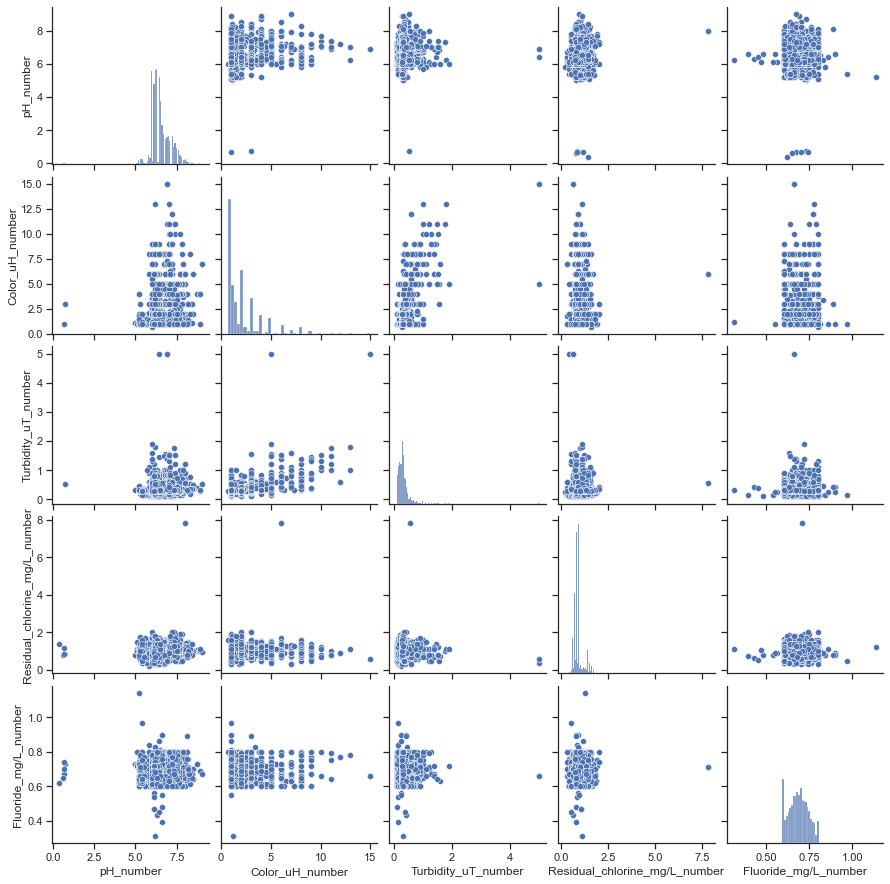

In [720]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset('penguins')
sns.pairplot(eval_param)

In [675]:
graph_df = df[['datetime', 'pH_number', 'Color_uH_number', 'Turbidity_uT_number', 'Residual_chlorine_mg/L_number', 'Fluoride_mg/L_number']]

KeyError: "None of [Index(['datetime', 'pH_number', 'Color_uH_number', 'Turbidity_uT_number',\n       'Residual_chlorine_mg/L_number', 'Fluoride_mg/L_number'],\n      dtype='object')] are in the [columns]"

In [672]:
def graphics(parameters):
    sns.scatterplot(data=graph_df, x=datetime, y=parameters)